In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import exp

In [2]:
df = pd.read_csv('~/Downloads/Social_Network_Ads.csv')
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


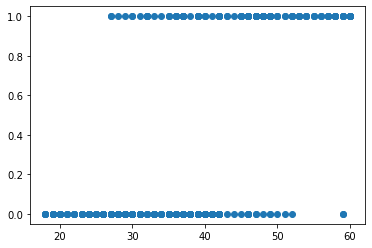

In [5]:
plt.scatter(df['Age'] , df['Purchased'])
plt.show()

### Establishing Depenedent and Independent Variables

* How does the user's age and estimated salary affect their decision to click on the advertisement ?
* Independent variable : X = Age and Estimated Salary
* Dependent variable : Y = Purchased

In [6]:
# Selection of 3rd col (Age) and 4th col (Estimated Age)
X = df.iloc[: , [2,3]]

# Selection of 5th col (Purchased)
Y = df.iloc[: , 4]

print(f'X --> \n {X}')
print('\n \n')
print(f'Y --> \n {Y}')

X --> 
      Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]

 

Y --> 
 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


### Splitting Dataset

* test data = 25% and train data = 75%
* random-state = 0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.25, random_state = 0)

print(f'X_train --> \n {X_train}')
print('-'*25)
print(f'X_test --> \n {X_test}')
print('-'*25)
print(f'Y_train --> \n {Y_train}')
print('-'*25)
print(f'Y_test --> \n {Y_test}')

X_train --> 
      Age  EstimatedSalary
250   44            39000
63    32           120000
312   38            50000
159   32           135000
283   52            21000
..   ...              ...
323   48            30000
192   29            43000
117   36            52000
47    27            54000
172   26           118000

[300 rows x 2 columns]
-------------------------
X_test --> 
      Age  EstimatedSalary
132   30            87000
309   38            50000
341   35            75000
196   30            79000
246   35            50000
..   ...              ...
146   27            96000
135   23            63000
390   48            33000
264   48            90000
364   42           104000

[100 rows x 2 columns]
-------------------------
Y_train --> 
 250    0
63     1
312    0
159    1
283    1
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 300, dtype: int64
-------------------------
Y_test --> 
 132    0
309    0
341    0
196    0
246    0
      ..


#### Feature Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver = 'lbfgs')
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

#### Predicting Test Results

In [10]:
Y_pred = classifier.predict(X_test)

print(f"X_test \n {X_test[:10]}")
print("-"*25)
print(f"Y_pred \n {Y_pred[:10]}")

X_test 
 [[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]]
-------------------------
Y_pred 
 [0 0 0 0 0 0 0 1 0 1]


#### Inferences about the relationship
* As the value of the independent variable increases(Age and Estimated Salary), the more likely it is that a given indivisual will click on the advertisement.
* Outcome - 0 is the center of the normal distribution
* It is essentially, rounding up or dowm based on if the indivisual's probability of clicking is closer to 0% or 100%

#### Comparing Observable Prediction Results
* Y_pred : prediction vector
* Y_test : actual observable values

In [12]:
df1 = pd.DataFrame({'Real Values' : Y_test, 'Predicted Values' : Y_pred})
df1.head(20)

,Real Values,Predicted Values
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
60,0,0
155,0,0
261,1,1
141,0,0
214,0,1


From the above values, we can observe that there is only 1 mismatched value at index 214, thus our model has a 19/20 or 95% prediction rate for the first 20 samples.

#### Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(Y_test, Y_pred)

print(f"Accuracy : {accuracy_score(Y_test, Y_pred)}")
print(cm)

Accuracy : 0.89
[[65  3]
 [ 8 24]]


It means that there were (65+24) = 89 correct predictions and (8+3) = 11 incorrect ones. Hence, the model has accomplished an 89% accuracy rating.

#### Visualizing The Logistic Regression Model

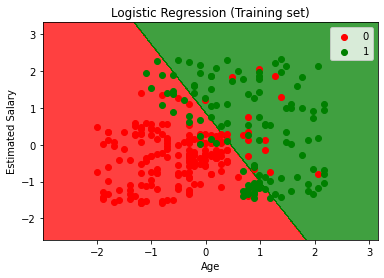

In [21]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

From the above graph, we draw the conclusion that : As the Age and Estimated Salary increases, each individual has a higher likelihood of being in the green region.